You are working with the government to transform your city into a smart city. The vision is to convert it into a digital and intelligent city to improve the efficiency of services for the citizens. One of the problems faced by the government is traffic. You are a data scientist working to manage the traffic of the city better and to provide input on infrastructure planning for the future.

The government wants to implement a robust traffic system for the city by being prepared for traffic peaks. They want to understand the traffic patterns of the four junctions of the city. Traffic patterns on holidays, as well as on various other occasions during the year, differ from normal working days. This is important to take into account for your forecasting.

To predict traffic patterns in each of these four junctions for the next 4 months.

The sensors on each of these junctions were collecting data at different times, hence you will see traffic data from different time periods. To add to the complexity, some of the junctions have provided limited or sparse data requiring thoughtfulness when creating future projections. Depending upon the historical data of 20 months, the government is looking to you to deliver accurate traffic projections for the coming four months. Your algorithm will become the foundation of a larger transformation to make your city smart and intelligent.


Import libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Import csv files

In [2]:
#read files
#Reading train file:
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Traffic-Forecasting/main/train_aWnotuB.csv')
#Reading test file:
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Traffic-Forecasting/main/test_BdBKkAj.csv')
#Reading sample submission file:
sample = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Traffic-Forecasting/main/sample_submission_EZmX9uE.csv')

In [3]:
train

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [4]:
test

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041
...,...,...,...
11803,2017-10-31 19:00:00,4,20171031194
11804,2017-10-31 20:00:00,4,20171031204
11805,2017-10-31 21:00:00,4,20171031214
11806,2017-10-31 22:00:00,4,20171031224


In [5]:
sample

,ID,Vehicles


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB


Check for null values

In [8]:
train.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [9]:
test.isnull().sum()

DateTime    0
Junction    0
ID          0
dtype: int64

Separate datetime

In [10]:
train['DateTime'] = pd.to_datetime(train['DateTime'], errors='coerce')
test['DateTime'] = pd.to_datetime(test['DateTime'], errors='coerce')

train['hourofday'] = train['DateTime'].dt.hour
test['hourofday'] = test['DateTime'].dt.hour

train['dayofweek'] = train['DateTime'].dt.dayofweek
test['dayofweek'] = test['DateTime'].dt.dayofweek

train['weekofyear'] = train['DateTime'].dt.week
test['weekofyear'] = test['DateTime'].dt.week

train['monthofyear'] = train['DateTime'].dt.month
test['monthofyear'] = test['DateTime'].dt.month

train['year'] = train['DateTime'].dt.year
test['year'] = test['DateTime'].dt.year


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # This is added back by InteractiveShellApp.init_path()


Prepare data

In [11]:
ID_train = train.ID
ID_test = test.ID

In [12]:
train.drop(['ID'], axis=1, inplace=True)
test.drop(['ID'], axis=1, inplace=True)
train

,DateTime,Junction,Vehicles,hourofday,dayofweek,weekofyear,monthofyear,year
0,2015-11-01 00:00:00,1,15,0,6,44,11,2015
1,2015-11-01 01:00:00,1,13,1,6,44,11,2015
2,2015-11-01 02:00:00,1,10,2,6,44,11,2015
3,2015-11-01 03:00:00,1,7,3,6,44,11,2015
4,2015-11-01 04:00:00,1,9,4,6,44,11,2015
...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,19,4,26,6,2017
48116,2017-06-30 20:00:00,4,30,20,4,26,6,2017
48117,2017-06-30 21:00:00,4,16,21,4,26,6,2017
48118,2017-06-30 22:00:00,4,22,22,4,26,6,2017


Graph data

Text(0, 0.5, 'Vehicles')

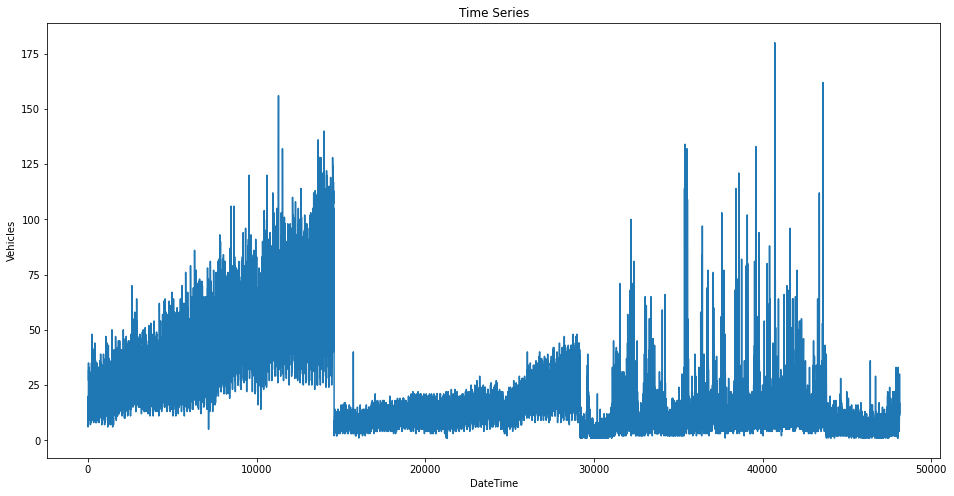

In [13]:
import matplotlib.pyplot as plt

train['Vehicles'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("DateTime") 
plt.ylabel("Vehicles")

Convert ds to year, month, day, and time

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DateTime     48120 non-null  datetime64[ns]
 1   Junction     48120 non-null  int64         
 2   Vehicles     48120 non-null  int64         
 3   hourofday    48120 non-null  int64         
 4   dayofweek    48120 non-null  int64         
 5   weekofyear   48120 non-null  int64         
 6   monthofyear  48120 non-null  int64         
 7   year         48120 non-null  int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 2.9 MB


Define X and y variables

In [15]:
y = train['Vehicles'].values
X = train.drop(['Vehicles', 'DateTime'], axis=1)
X_test = test.drop(['DateTime'], axis=1)

Split training set for testing and validation

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((43308, 6), (4812, 6), (43308,), (4812,), (11808, 6))

Make pipeline

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

model = make_pipeline(StandardScaler(), BaggingRegressor(base_estimator=GradientBoostingRegressor(max_depth=10, min_samples_split=2, loss='ls',n_estimators=400, learning_rate=.1, random_state=1))).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9910948246302898


Predict on validation set

In [18]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
print(model.score(X_val, y_val)), print(r2_score(y_pred, model.predict(X_val)))

0.9688273030719217
0.9991940663788277


(None, None)

In [19]:
y_pred

array([ 20, 109,  15, ...,   9,  48,  17])

In [20]:
df_val=pd.DataFrame({'actual': y_val, 'predicted': y_pred})
df_val.reset_index(drop=True, inplace=True)
df_val

,actual,predicted
0,18,20
1,107,109
2,14,15
3,18,21
4,11,21
...,...,...
4807,4,7
4808,46,47
4809,8,9
4810,49,48


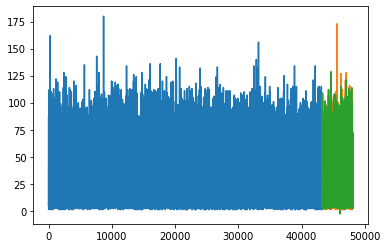

In [21]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])
pyplot.plot([None for i in y_train] + [x for x in y_pred])
pyplot.show()

Predict on test set

In [22]:
final_labels = model.predict(X_test)
final_labels = final_labels.astype(int)
final_labels

array([66, 58, 47, ...,  8,  9,  6])

In [23]:
output = pd.DataFrame({'ID': ID_test, 'Vehicles': final_labels})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [24]:
#upload submission
submission = pd.read_csv("submission.csv")
submission

,ID,Vehicles
0,20170701001,66
1,20170701011,58
2,20170701021,47
3,20170701031,40
4,20170701041,34
...,...,...
11803,20171031194,11
11804,20171031204,7
11805,20171031214,8
11806,20171031224,9
